In [2]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
import random

In [3]:
def criaDatasetBidimensionalBinário(n=20, slop=[2, 1], intercept=-0.4):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

In [4]:
def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

In [5]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

In [8]:
def sign(a):
  return (a >= 0) * 2 - 1

def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

In [9]:
def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

In [10]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

In [11]:
slop = [2, 1]
intercept = -0.4
Xtr, ytr = criaDatasetBidimensionalBinário(n=20, slop=slop, intercept=intercept)
Xtr, ytr

(array([[0.12646243, 0.25549728],
        [0.98962943, 0.62210641],
        [0.83550444, 0.21123741],
        [0.24768649, 0.76600192],
        [0.00616804, 0.88256204],
        [0.15915119, 0.90008504],
        [0.91766312, 0.76571614],
        [0.94069091, 0.76647991],
        [0.0658211 , 0.48196246],
        [0.73764078, 0.89311253],
        [0.64043632, 0.73290079],
        [0.15574828, 0.05341001],
        [0.75573145, 0.10086588],
        [0.31098419, 0.62337947],
        [0.81061007, 0.42888697],
        [0.21304292, 0.63659447],
        [0.42763004, 0.44897858],
        [0.75433896, 0.71519517],
        [0.81349024, 0.70821215],
        [0.60021858, 0.56421641]]),
 array([-1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,
         1,  1,  1]))

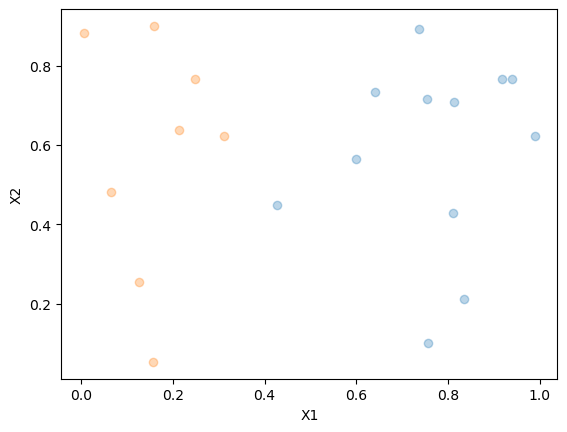

In [12]:
plotaDatasetBidimensional(Xtr, ytr)

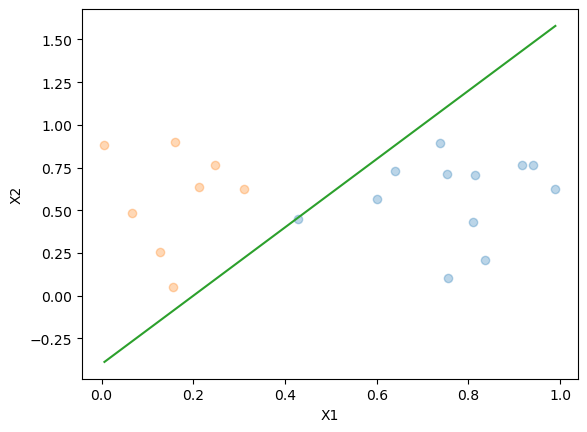

In [13]:
plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

1.0
[-9.25508621 31.60994382 -4.74849413]


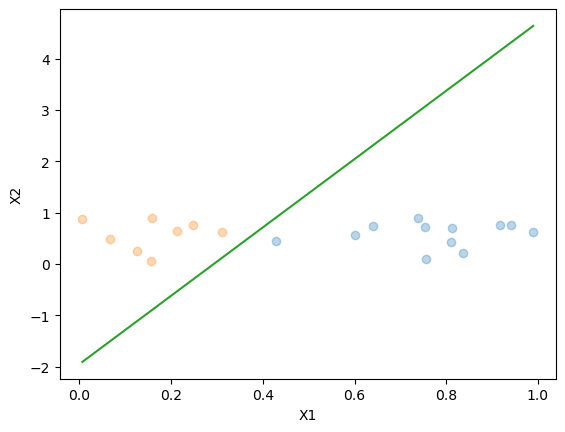

In [14]:
perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])

0.892


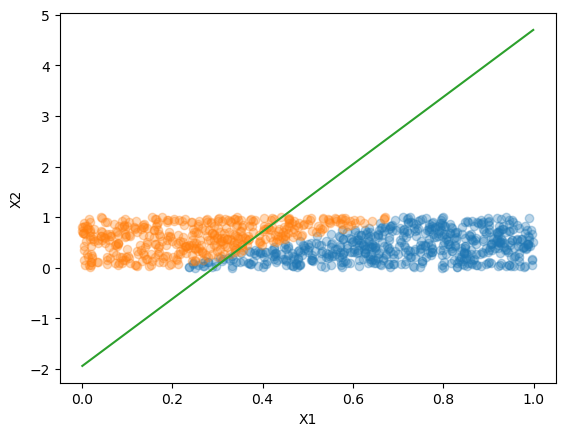

In [15]:
Xte, yte = criaDatasetBidimensionalBinário(1000)
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
     